In [185]:
# import the modules

import pandas as pd
pd.set_option('max_columns',100)
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df= pd.read_csv('../Employee Attrition project/train.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        1281 non-null   int64 
 1   Age                       1281 non-null   int64 
 2   BusinessTravel            1281 non-null   object
 3   DailyRate                 1281 non-null   int64 
 4   Department                1281 non-null   object
 5   DistanceFromHome          1281 non-null   int64 
 6   Education                 1281 non-null   int64 
 7   EducationField            1281 non-null   object
 8   EmployeeCount             1281 non-null   int64 
 9   EmployeeNumber            1281 non-null   int64 
 10  EnvironmentSatisfaction   1281 non-null   int64 
 11  Gender                    1281 non-null   object
 12  HourlyRate                1281 non-null   int64 
 13  JobInvolvement            1281 non-null   int64 
 14  JobLevel                

,Id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,784,38,Travel_Rarely,330,Research & Development,17,1,Life Sciences,1,1088,3,Female,65,2,3,Healthcare Representative,3,Married,8823,24608,0,Y,No,18,3,1,80,1,20,4,2,19,9,1,9,No
1,1383,36,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,1,Male,66,4,1,Laboratory Technician,2,Married,2810,9238,1,Y,No,22,4,2,80,0,5,3,3,5,4,0,2,No
2,71,29,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4,No
3,1414,47,Travel_Rarely,1180,Research & Development,25,3,Medical,1,1993,1,Male,84,3,3,Healthcare Representative,3,Single,8633,13084,2,Y,No,23,4,2,80,0,25,3,3,17,14,12,11,No
4,1184,54,Travel_Rarely,584,Research & Development,22,5,Medical,1,1665,2,Female,91,3,4,Manager,3,Married,17426,18685,3,Y,No,25,4,3,80,1,36,6,3,10,8,4,7,No
5,1270,34,Travel_Rarely,511,Sales,3,2,Life Sciences,1,1779,4,Female,32,1,2,Sales Executive,4,Single,6029,25353,5,Y,No,12,3,1,80,0,6,3,3,2,2,2,2,No
6,681,38,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,1,950,4,Female,80,3,3,Research Director,1,Married,13582,16292,1,Y,No,13,3,2,80,1,15,3,3,15,12,5,11,No
7,968,36,Travel_Frequently,607,Sales,7,3,Marketing,1,1362,1,Female,83,4,2,Sales Executive,1,Married,4639,2261,2,Y,No,16,3,4,80,1,17,2,2,15,7,6,13,No
8,1370,47,Non-Travel,1169,Research & Development,14,4,Technical Degree,1,1934,3,Male,64,3,2,Research Scientist,2,Married,5467,2125,8,Y,No,18,3,3,80,1,16,4,4,8,7,1,7,No
9,1356,41,Travel_Rarely,337,Sales,8,3,Marketing,1,1909,3,Female,54,3,2,Sales Executive,2,Married,4393,26841,5,Y,No,21,4,3,80,1,14,3,3,5,4,1,4,No


In [149]:
df.Attrition.value_counts()

No     984
Yes    297
Name: Attrition, dtype: int64

In [187]:
df.drop('Id',1,inplace = True)

In [188]:
df.head().transpose()

,0,1,2,3,4
Age,38,36,29,47,54
BusinessTravel,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,330,1351,1328,1180,584
Department,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,17,9,2,25,22
Education,1,4,3,3,5
EducationField,Life Sciences,Life Sciences,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1088,1949,94,1993,1665
EnvironmentSatisfaction,3,1,3,1,2


In [152]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.025752,-0.002156,0.221513,NaN,0.018200,-0.025125,0.039541,0.039771,0.523336,-0.005268,0.513115,0.017182,0.309444,0.004020,0.000949,0.063455,NaN,0.072515,0.688406,-0.006882,-0.010340,0.332465,0.225107,0.239191,0.221073
DailyRate,-0.025752,1.000000,-0.013921,-0.025095,NaN,-0.035203,0.030626,0.026947,0.015332,-0.008611,0.037258,-0.000996,-0.058652,0.047535,-0.019298,-0.015614,-0.023874,NaN,0.035522,-0.010843,-0.001333,-0.039484,-0.062021,0.007263,-0.051850,-0.041359
DistanceFromHome,-0.002156,-0.013921,1.000000,0.023302,NaN,0.025867,-0.053383,0.035517,-0.007564,0.009115,0.008369,-0.016132,0.011824,-0.042884,0.061822,0.061031,-0.008257,NaN,0.034674,-0.002623,-0.024844,-0.042728,0.009278,0.018346,0.013177,0.021750
Education,0.221513,-0.025095,0.023302,1.000000,NaN,0.049957,-0.030916,0.027251,0.071379,0.112250,-0.018563,0.105758,-0.031424,0.107925,-0.014144,-0.031815,-0.001043,NaN,0.022053,0.152164,-0.030474,0.016159,0.078887,0.068289,0.074722,0.071223
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.018200,-0.035203,0.025867,0.049957,NaN,1.000000,-0.003747,0.045809,-0.009027,0.007162,-0.052028,0.012637,0.009530,-0.005627,-0.017320,-0.025171,-0.079487,NaN,0.068233,0.013145,0.047406,0.040176,0.008301,0.023777,0.015462,0.013927
EnvironmentSatisfaction,-0.025125,0.030626,-0.053383,-0.030916,NaN,-0.003747,1.000000,-0.046305,0.031561,-0.005600,-0.006734,-0.004414,0.016912,-0.049691,-0.032058,-0.025635,0.011578,NaN,0.011850,-0.022022,-0.009859,0.027643,0.016898,0.031158,0.040236,0.021854
HourlyRate,0.039541,0.026947,0.035517,0.027251,NaN,0.045809,-0.046305,1.000000,0.056323,-0.028879,-0.089277,-0.013986,0.001518,0.034562,-0.010959,-0.017316,0.012412,NaN,0.022945,0.001642,-0.016487,-0.030034,-0.020821,-0.020591,-0.047610,-0.036915
JobInvolvement,0.039771,0.015332,-0.007564,0.071379,NaN,-0.009027,0.031561,0.056323,1.000000,-0.015035,-0.019565,-0.018595,-0.022562,0.031019,-0.001173,-0.018188,0.037001,NaN,0.021838,0.001749,0.004551,0.027682,-0.036513,0.007786,-0.026227,0.014614
JobLevel,0.523336,-0.008611,0.009115,0.112250,NaN,0.007162,-0.005600,-0.028879,-0.015035,1.000000,-0.018819,0.950639,0.034979,0.139073,-0.012865,-0.009646,0.025018,NaN,0.036405,0.778598,-0.025926,0.033285,0.540760,0.397396,0.354010,0.389455


In [154]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,Travel_Rarely,330,Research & Development,17,1,Life Sciences,1,1088,3,Female,65,2,3,Healthcare Representative,3,Married,8823,24608,0,Y,No,18,3,1,80,1,20,4,2,19,9,1,9,No
1,36,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,1,Male,66,4,1,Laboratory Technician,2,Married,2810,9238,1,Y,No,22,4,2,80,0,5,3,3,5,4,0,2,No
2,29,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4,No
3,47,Travel_Rarely,1180,Research & Development,25,3,Medical,1,1993,1,Male,84,3,3,Healthcare Representative,3,Single,8633,13084,2,Y,No,23,4,2,80,0,25,3,3,17,14,12,11,No
4,54,Travel_Rarely,584,Research & Development,22,5,Medical,1,1665,2,Female,91,3,4,Manager,3,Married,17426,18685,3,Y,No,25,4,3,80,1,36,6,3,10,8,4,7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,31,Travel_Frequently,1125,Research & Development,1,3,Life Sciences,1,1956,4,Male,48,1,2,Research Scientist,1,Married,5003,5771,1,Y,No,21,4,2,80,0,10,6,3,10,8,8,7,No
1277,25,Travel_Rarely,180,Research & Development,2,1,Medical,1,854,1,Male,65,4,1,Research Scientist,1,Single,3424,21632,7,Y,No,13,3,3,80,0,6,3,2,4,3,0,1,No
1278,29,Travel_Frequently,1413,Sales,1,1,Medical,1,312,2,Female,42,3,3,Sales Executive,4,Married,7918,6599,1,Y,No,14,3,4,80,1,11,5,3,11,10,4,1,No
1279,45,Travel_Rarely,974,Research & Development,1,4,Medical,1,996,4,Female,91,3,1,Laboratory Technician,4,Divorced,2270,11005,3,Y,No,14,3,4,80,2,8,2,3,5,3,0,2,No


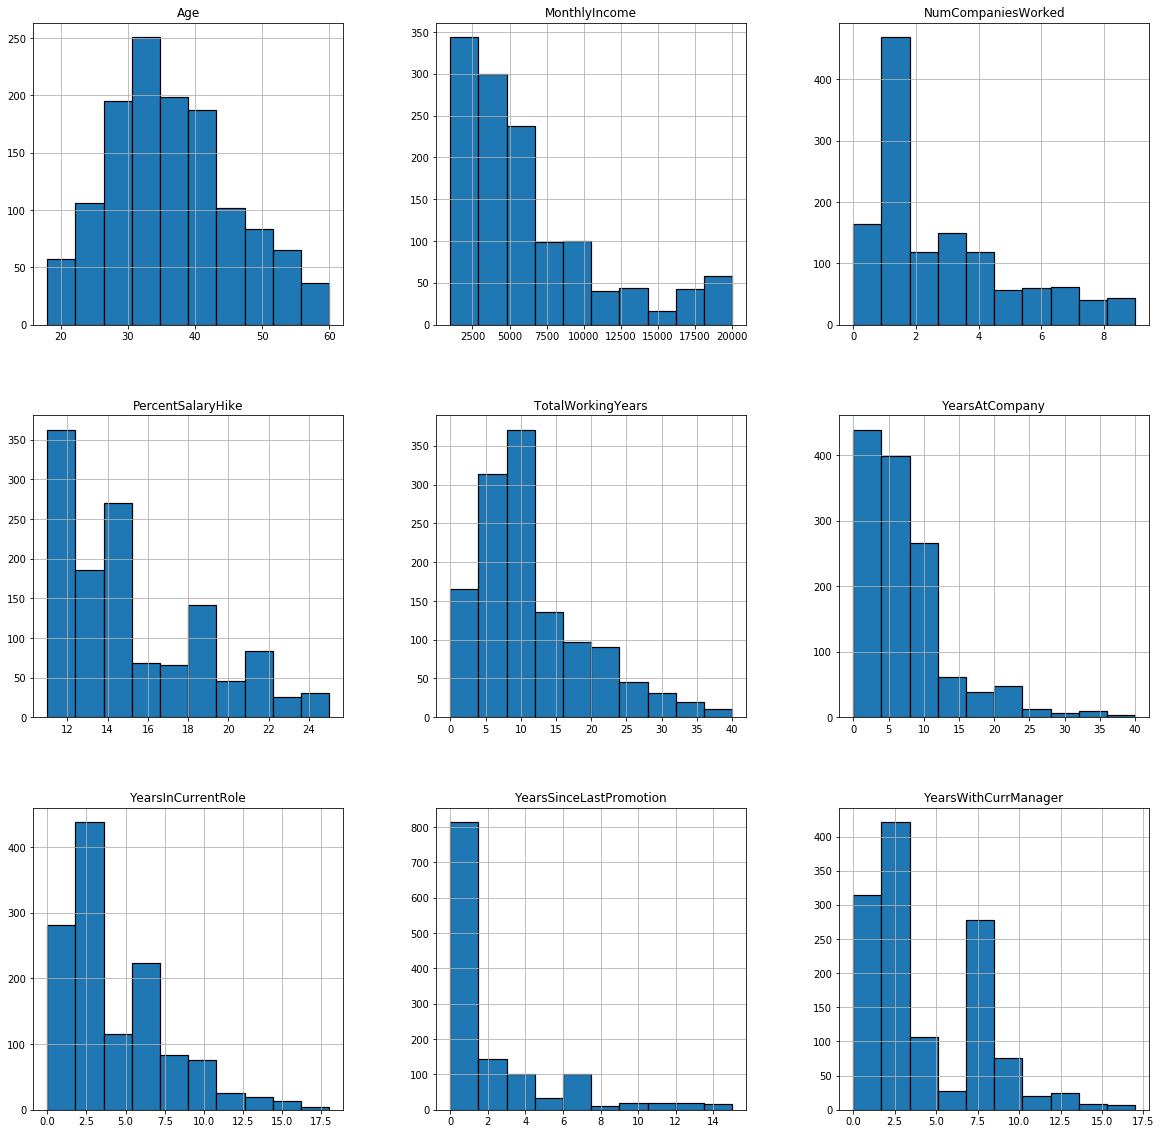

In [87]:
# Visulazing the distibution of the data for every feature
df[['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', \
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', \
       'YearsWithCurrManager']].hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [190]:
# df.drop(columns=['DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'Gender'], \
#            axis=1, inplace=True)

In [189]:
#Categorical Variable|
print('Categorical Coulmns : ', list(df.select_dtypes(include=['object']).columns))

Categorical Coulmns :  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Attrition']


In [191]:
#Copy only categorical variable to perform operaion on it.
hr_cat_df = df.select_dtypes(include=['object']).copy()
hr_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  1281 non-null   object
 1   Department      1281 non-null   object
 2   EducationField  1281 non-null   object
 3   Gender          1281 non-null   object
 4   JobRole         1281 non-null   object
 5   MaritalStatus   1281 non-null   object
 6   Over18          1281 non-null   object
 7   OverTime        1281 non-null   object
 8   Attrition       1281 non-null   object
dtypes: object(9)
memory usage: 90.2+ KB


In [192]:
#Convert Object to Category as Datatype to process
hr_cat_df['BusinessTravel'] = hr_cat_df['BusinessTravel'].astype('category')
hr_cat_df['Attrition']      = hr_cat_df['Attrition'].astype('category')
hr_cat_df['Department']     = hr_cat_df['Department'].astype('category')
hr_cat_df['EducationField'] = hr_cat_df['EducationField'].astype('category')
hr_cat_df['JobRole']        = hr_cat_df['JobRole'].astype('category')
hr_cat_df['MaritalStatus']  = hr_cat_df['MaritalStatus'].astype('category')
hr_cat_df['OverTime']       = hr_cat_df['OverTime'].astype('category')
hr_cat_df['Gender']  = hr_cat_df['Gender'].astype('category')
hr_cat_df['Over18']       = hr_cat_df['Over18'].astype('category')

In [193]:
#To Confirm if Object type converted to category
hr_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   BusinessTravel  1281 non-null   category
 1   Department      1281 non-null   category
 2   EducationField  1281 non-null   category
 3   Gender          1281 non-null   category
 4   JobRole         1281 non-null   category
 5   MaritalStatus   1281 non-null   category
 6   Over18          1281 non-null   category
 7   OverTime        1281 non-null   category
 8   Attrition       1281 non-null   category
dtypes: category(9)
memory usage: 12.6 KB


In [194]:
#Copy Original dataframe to other dataframe
hr_final_df = df.copy() 
hr_final_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,Travel_Rarely,330,Research & Development,17,1,Life Sciences,1,1088,3,Female,65,2,3,Healthcare Representative,3,Married,8823,24608,0,Y,No,18,3,1,80,1,20,4,2,19,9,1,9,No
1,36,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,1,Male,66,4,1,Laboratory Technician,2,Married,2810,9238,1,Y,No,22,4,2,80,0,5,3,3,5,4,0,2,No
2,29,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4,No
3,47,Travel_Rarely,1180,Research & Development,25,3,Medical,1,1993,1,Male,84,3,3,Healthcare Representative,3,Single,8633,13084,2,Y,No,23,4,2,80,0,25,3,3,17,14,12,11,No
4,54,Travel_Rarely,584,Research & Development,22,5,Medical,1,1665,2,Female,91,3,4,Manager,3,Married,17426,18685,3,Y,No,25,4,3,80,1,36,6,3,10,8,4,7,No


In [195]:
#Apply Feature Engineering Technique.
#Replacing values Method
hr_final_df['BusinessTravel'] = hr_cat_df['BusinessTravel'].cat.codes
hr_final_df['Attrition'] = hr_cat_df['Attrition'].cat.codes
hr_final_df['Department'] = hr_cat_df['Department'].cat.codes
hr_final_df['EducationField'] = hr_cat_df['EducationField'].cat.codes
hr_final_df['JobRole'] = hr_cat_df['JobRole'].cat.codes
hr_final_df['MaritalStatus'] = hr_cat_df['MaritalStatus'].cat.codes
hr_final_df['OverTime'] = hr_cat_df['OverTime'].cat.codes
hr_final_df['Gender'] = hr_cat_df['Gender'].cat.codes
hr_final_df['Over18'] = hr_cat_df['Over18'].cat.codes

In [196]:
hr_final_df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,2,330,1,17,1,1,1,1088,3,0,65,2,3,0,3,1,8823,24608,0,0,0,18,3,1,80,1,20,4,2,19,9,1,9,0
1,36,0,1351,1,9,4,1,1,1949,1,1,66,4,1,2,2,1,2810,9238,1,0,0,22,4,2,80,0,5,3,3,5,4,0,2,0
2,29,2,1328,1,2,3,1,1,94,3,1,76,3,1,6,2,1,2703,4956,0,0,0,23,4,4,80,1,6,3,3,5,4,0,4,0
3,47,2,1180,1,25,3,3,1,1993,1,1,84,3,3,0,3,2,8633,13084,2,0,0,23,4,2,80,0,25,3,3,17,14,12,11,0
4,54,2,584,1,22,5,3,1,1665,2,0,91,3,4,3,3,1,17426,18685,3,0,0,25,4,3,80,1,36,6,3,10,8,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,31,1,1125,1,1,3,1,1,1956,4,1,48,1,2,6,1,1,5003,5771,1,0,0,21,4,2,80,0,10,6,3,10,8,8,7,0
1277,25,2,180,1,2,1,3,1,854,1,1,65,4,1,6,1,2,3424,21632,7,0,0,13,3,3,80,0,6,3,2,4,3,0,1,0
1278,29,1,1413,2,1,1,3,1,312,2,0,42,3,3,7,4,1,7918,6599,1,0,0,14,3,4,80,1,11,5,3,11,10,4,1,0
1279,45,2,974,1,1,4,3,1,996,4,0,91,3,1,2,4,0,2270,11005,3,0,0,14,3,4,80,2,8,2,3,5,3,0,2,0


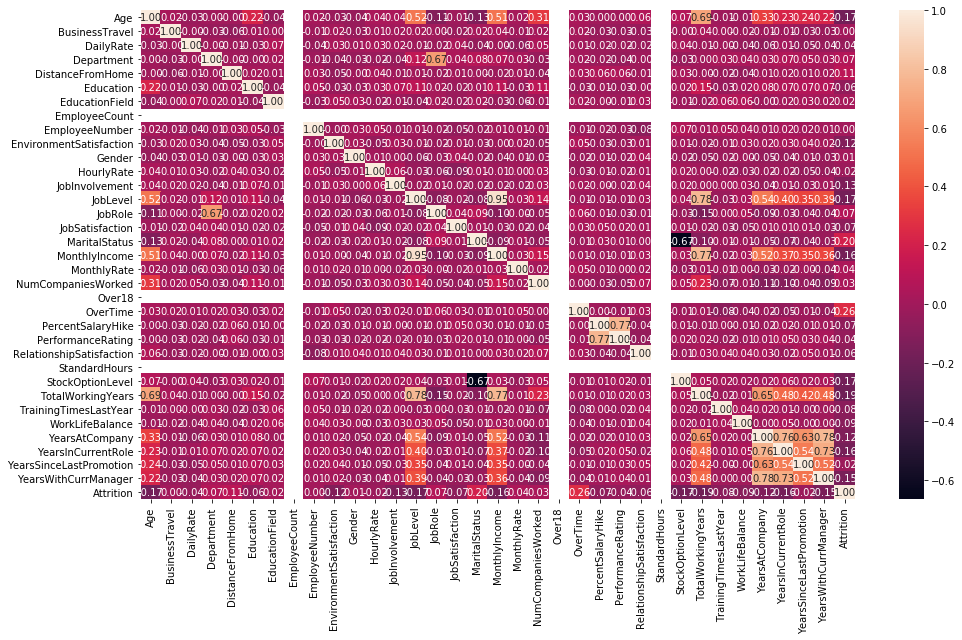

In [197]:
#Correlation betn all columns
corr = hr_final_df.corr()
f,ax = plt.subplots(figsize=(16,9))
sns.heatmap(corr, cbar = True ,annot = True,fmt ='.2f',annot_kws ={'size':10})

In [198]:
hr_final_df.drop(columns=['MonthlyIncome','PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'],axis=1, inplace=True)

In [199]:
hr_final_df.shape

(1281, 30)

In [200]:
import time as time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [201]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [167]:
# covert all catogorical data into numeric data
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [168]:
df

,Age,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,20,2,131,1,0,1,2,35,1,2,0,2,1,844,1064,0,0,7,0,0,1,20,4,1,19,9,1,9,0
1,18,0,705,1,3,1,0,36,3,0,2,1,1,246,336,1,0,11,1,1,0,5,3,2,5,4,0,2,0
2,11,2,691,1,2,1,2,46,2,0,6,1,1,216,128,0,0,12,1,3,1,6,3,2,5,4,0,4,0
3,29,2,599,1,2,3,0,54,2,2,0,2,2,837,508,2,0,12,1,1,0,25,3,2,17,14,12,11,0
4,36,2,266,1,4,3,1,61,2,3,3,2,1,1046,771,3,0,14,1,2,1,36,6,2,10,8,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,13,1,572,1,2,1,3,18,0,1,6,0,1,560,175,1,0,10,1,1,0,10,6,2,10,8,8,7,0
1277,7,2,48,1,0,3,0,35,3,0,6,0,2,332,921,7,0,2,0,2,0,6,3,1,4,3,0,1,0
1278,11,1,741,2,0,3,1,12,2,2,7,3,1,808,209,1,0,3,0,3,1,11,5,2,11,10,4,1,0
1279,27,2,488,1,3,3,3,61,2,0,2,3,0,94,422,3,0,3,0,3,2,8,2,2,5,3,0,2,0


In [169]:
df.Attrition.value_counts()

0    984
1    297
Name: Attrition, dtype: int64

In [202]:
t0 = time.time()
X = hr_final_df.drop('Attrition',1)
y = hr_final_df.Attrition

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.3)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state = 42)

model.fit(X_train, y_train)

pred = model.predict(X_test)

t1 = time.time()

print('Time Taken:', t1-t0)
print('Accuracy:', accuracy_score(y_test, pred))
print('Precision:', precision_score(y_test, pred))
print('Recall:', recall_score(y_test, pred))
print('roc_score:',roc_auc_score(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))

Time Taken: 0.47672176361083984
Accuracy: 0.8909090909090909
Precision: 0.9056603773584906
Recall: 0.5647058823529412
roc_score: 0.7740196078431373
Confusion Matrix: [[295   5]
 [ 37  48]]


In [220]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred_a= ad.predict(X_test)
confusion_matrix(y_test,y_pred_a)

from sklearn.metrics import precision_score,accuracy_score,f1_score
f1_score(y_test, y_pred_a,average='weighted')
accuracy_ad=ad.score(X_test,y_test)
print(accuracy_ad)

roc_score = roc_auc_score(y_test, y_pred_a)
print("roc_score: ", roc_score)

0.7948051948051948
roc_score:  0.6786274509803922


In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,accuracy_score

de =DecisionTreeClassifier()
de.fit(X_train,y_train)
y_pred_de= de.predict(X_test)
confusion_matrix(y_test,y_pred_de)

accuracy_de=de.score(X_test,y_test)

print(accuracy_de)

roc_score = roc_auc_score(y_test, y_pred_de)
print("roc_score: ", roc_score)

0.8051948051948052
roc_score:  0.7485294117647059


0.8805194805194805


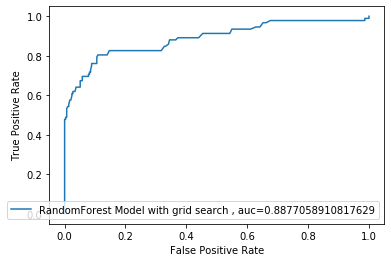

In [135]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Random forest with GridSearchCV
parameters = {'n_estimators':[500]}
# instantiate random forest model
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

# grid search on random forest classifier 

grid_rf = GridSearchCV(estimator=rf, param_grid=parameters)
grid_rf.fit(X_train, y_train)

# make predictions 
y_pred_rf = grid_rf.predict(X_test)
precision_rf= accuracy_score(y_pred_rf,y_test)

# plot_cm(grid_rf, y_pred_rf)
print(precision_rf)

# Plot the auc-roc curve
score = roc_auc_score(y_pred_rf , y_test)
y_pred_proba = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RandomForest Model with grid search , auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

0.3431372549019608


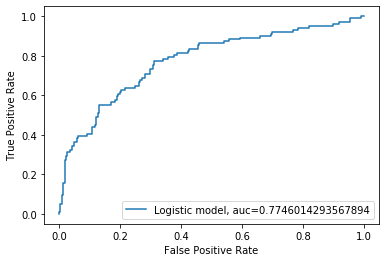

In [122]:
#Logistic regression with GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here

# instantiate logistic regression model
lr=LogisticRegression(random_state=9)
lr.fit(X_train,y_train)
# grid search on logistic regression

grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_test)
precision= precision_score(y_pred,y_test)
# plot_cm(grid, y_pred)
print(precision)

# Plot the auc-roc curve
score = roc_auc_score(y_pred , y_test)
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

C:\Users\sarika\python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.6543209876543211
Precision: 0.8833333333333333
Recall: 0.5196078431372549
ROC Score: 0.7489004947773502
Confusion Matrix:
 [[314   7]
 [ 49  53]]


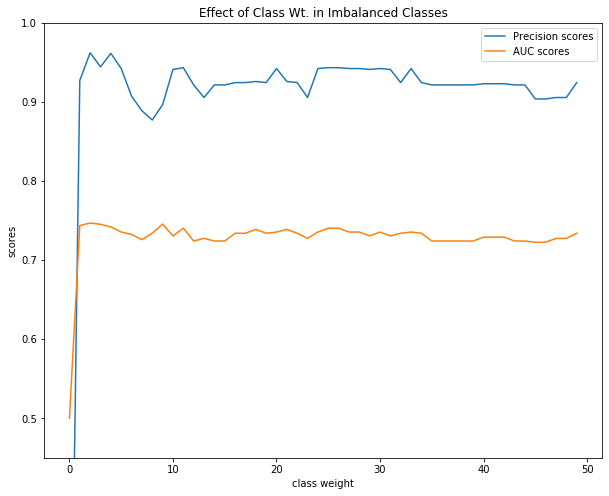

In [58]:
# Creating list of class weights
class_wts = range(50)

prs = []
auc = []
#Loop to iterate different weights to the minority class(1) 
for wt in class_wts:
    rf7 = RandomForestClassifier(random_state=0, class_weight={0:1,1:wt})
    rf7.fit(X_train, y_train)
    prs.append(precision_score(y_test, rf7.predict(X_test)))
    auc.append(roc_auc_score(y_test, rf7.predict(X_test)))


#Selecting the max f1 score    
max_scorer = prs.index(np.max(prs))

#Selecting the model with the max score
rf7 = RandomForestClassifier(random_state=42, class_weight={0:1,1:max_scorer})
rf7.fit(X_train, y_train)

print ("F1 score:", f1_score(y_test, rf7.predict(X_test)))
print ("Precision:",precision_score(y_test, rf7.predict(X_test)))
print ("Recall:",recall_score(y_test, rf7.predict(X_test)))
print ("ROC Score:",roc_auc_score(y_test, rf7.predict(X_test)))
print ("Confusion Matrix:\n",confusion_matrix(y_test, rf7.predict(X_test)))

plt.figure(figsize=(10, 8))
plt.plot(class_wts, prs, label="Precision scores")
plt.plot(class_wts, auc, label="AUC scores")
plt.xlabel("class weight")
plt.ylabel("scores")
plt.title("Effect of Class Wt. in Imbalanced Classes")
plt.ylim(0.45,1)
plt.legend()
plt.show()

In [126]:
from imblearn.over_sampling import SMOTE

# Code starts here
smote = SMOTE(random_state=0)
#Fitting and transforming data points
X_sample, y_sample = smote.fit_sample(X_train, y_train)

precision is : 0.8028169014084507
acuracy is : 0.8605200945626478
recall is : 0.5588235294117647
f1 score is : 0.6589595375722543
ROC Score: 0.7576049111233278


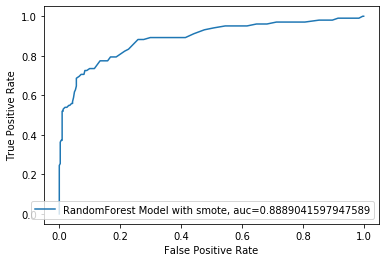

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_smote=RandomForestClassifier(random_state=0)
rf_smote.fit(X_sample,y_sample)
y_pred_smote= rf_smote.predict(X_test)
accuracy_smote= rf_smote.score(X_test,y_test)
recall_smote= recall_score(y_test,y_pred_smote)
precision_smote= precision_score(y_test,y_pred_smote)
f1_smote= f1_score(y_test,y_pred_smote)


#After Sampling    
print("precision is :",precision_smote)
print("acuracy is :",accuracy_smote)
print("recall is :",recall_smote)
print("f1 score is :",f1_smote)
print ("ROC Score:",roc_auc_score(y_test, rf_smote.predict(X_test)))
# Plot the auc-roc curve
score = roc_auc_score(y_pred_smote , y_test)
y_pred_proba = rf_smote.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RandomForest Model with smote, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [142]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.8)
X_train_ns,y_train_ns = os.fit_sample(X_train, y_train)

classfier = RandomForestClassifier()
classfier.fit(X_train_ns, y_train_ns)
y_pred_o = classfier.predict(X_test)

print("ROC AUC SCORE: ",roc_auc_score(y_test, y_pred_o))


C:\Users\sarika\python\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


ROC AUC SCORE:  0.7652285205520107


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [4]:
# Code starts here






# Code ends here

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [5]:
# Code starts here






# Code ends here

### Model building

- Now let's come to the actual task, using Decision Tree/Ensemble Technique, predict the `Attrition`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the [ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [6]:
# Code Starts here




# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [203]:
# Code Starts here
# Code starts here
test_data=pd.read_csv('test.csv')
test_data.head()
test_data.drop(['Id'],axis = 1, inplace = True)
# # Code ends here

In [204]:
test_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,1355,2,Female,31,3,2,Sales Executive,1,Divorced,6893,19461,3,Y,No,15,3,4,80,1,11,3,3,7,7,1,7
1,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,Male,33,3,1,Sales Representative,1,Married,1790,26956,1,Y,No,19,3,1,80,1,1,3,2,1,0,1,0
2,45,Travel_Frequently,306,Sales,26,4,Life Sciences,1,684,1,Female,100,3,2,Sales Executive,1,Married,4286,5630,2,Y,No,14,3,4,80,2,5,4,3,1,1,0,0
3,26,Travel_Rarely,1449,Research & Development,16,4,Medical,1,394,1,Male,45,3,1,Laboratory Technician,2,Divorced,2373,14180,2,Y,Yes,13,3,4,80,1,5,2,3,3,2,0,2
4,49,Travel_Rarely,1261,Research & Development,7,3,Other,1,499,2,Male,31,2,3,Healthcare Representative,3,Single,10965,12066,8,Y,No,24,4,3,80,0,26,2,3,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,29,Travel_Rarely,896,Research & Development,18,1,Medical,1,315,3,Male,86,2,1,Research Scientist,4,Single,2389,14961,1,Y,Yes,13,3,3,80,0,4,3,2,4,3,0,1
317,40,Travel_Rarely,1416,Research & Development,2,2,Medical,1,352,1,Male,49,3,5,Research Director,3,Divorced,19436,5949,0,Y,No,19,3,4,80,1,22,5,3,21,7,3,9
318,29,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
319,59,Travel_Rarely,818,Human Resources,6,2,Medical,1,321,2,Male,52,3,1,Human Resources,3,Married,2267,25657,8,Y,No,17,3,4,80,0,7,2,2,2,2,2,2


In [211]:
#Convert Object to Category as Datatype to process
test_data['BusinessTravel'] = test_data['BusinessTravel'].astype('category')
test_data['Department']     = test_data['Department'].astype('category')
test_data['EducationField'] = test_data['EducationField'].astype('category')
test_data['JobRole']        = test_data['JobRole'].astype('category')
test_data['MaritalStatus']  = test_data['MaritalStatus'].astype('category')
test_data['OverTime']       = test_data['OverTime'].astype('category')
test_data['Gender']  = test_data['Gender'].astype('category')
test_data['Over18']       = test_data['Over18'].astype('category')

In [212]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       321 non-null    int64   
 1   BusinessTravel            321 non-null    category
 2   DailyRate                 321 non-null    int64   
 3   Department                321 non-null    category
 4   DistanceFromHome          321 non-null    int64   
 5   Education                 321 non-null    int64   
 6   EducationField            321 non-null    category
 7   EmployeeCount             321 non-null    int64   
 8   EmployeeNumber            321 non-null    int64   
 9   EnvironmentSatisfaction   321 non-null    int64   
 10  Gender                    321 non-null    category
 11  HourlyRate                321 non-null    int64   
 12  JobInvolvement            321 non-null    int64   
 13  JobLevel                  321 non-null    int64   

In [213]:
#Replacing values Method
test_data['BusinessTravel'] = test_data['BusinessTravel'].cat.codes

test_data['Department'] = test_data['Department'].cat.codes
test_data['EducationField'] = test_data['EducationField'].cat.codes
test_data['JobRole'] = test_data['JobRole'].cat.codes
test_data['MaritalStatus'] = test_data['MaritalStatus'].cat.codes
test_data['OverTime'] = test_data['OverTime'].cat.codes
test_data['Gender'] = test_data['Gender'].cat.codes
test_data['Over18'] = test_data['Over18'].cat.codes

In [215]:
test_data.drop(columns=['MonthlyIncome','PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'],axis=1, inplace=True)

In [216]:
test_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,38,2,1009,2,2,2,1,1,1355,2,0,31,3,2,7,1,0,19461,3,0,0,15,4,80,1,3,3,7,1
1,23,1,638,2,9,3,2,1,2023,4,1,33,3,1,8,1,1,26956,1,0,0,19,1,80,1,3,2,1,1
2,45,1,306,2,26,4,1,1,684,1,0,100,3,2,7,1,1,5630,2,0,0,14,4,80,2,4,3,1,0
3,26,2,1449,1,16,4,3,1,394,1,1,45,3,1,2,2,0,14180,2,0,1,13,4,80,1,2,3,3,0
4,49,2,1261,1,7,3,4,1,499,2,1,31,2,3,0,3,2,12066,8,0,0,24,3,80,0,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,29,2,896,1,18,1,3,1,315,3,1,86,2,1,6,4,2,14961,1,0,1,13,3,80,0,3,2,4,0
317,40,2,1416,1,2,2,3,1,352,1,1,49,3,5,5,3,0,5949,0,0,0,19,4,80,1,5,3,21,3
318,29,2,153,1,15,2,1,1,15,4,0,49,2,2,2,3,2,12682,0,0,1,12,4,80,0,3,3,9,0
319,59,2,818,0,6,2,3,1,321,2,1,52,3,1,1,3,1,25657,8,0,0,17,4,80,0,2,2,2,2


In [217]:
test=pd.read_csv('test.csv')
id_ = test['Id']

In [224]:
# Code starts here
# Predict on the test data
y_de=  de.predict(test_data)

print(y_de)
# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Attrition':y_de})

# Convert the sample submission file into a csv file
sample_submission.to_csv('Attrition_de.csv',index=False)

[0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0]


In [225]:
# Code Starts here

sample_submission['Attrition'].value_counts()







# Code ends here

0    239
1     82
Name: Attrition, dtype: int64